IMPLEMENTING STOCHASTIC GRADIENT DESCENT LINEAR REGRESSION ALGO with only 1 feature

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\coursera_ml\\data.csv')
arr = df.to_numpy()

m = arr.shape[0]
print(type(df))
print(type(arr))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [6]:
x_train = []
y_train = []

for i in range(m):
    x_train.append(arr[i][0])
    y_train.append(arr[i][1])

print(x_train)
print(y_train)
print(type(x_train))

[1, 2]
[300, 500]
<class 'list'>


In [7]:
#a func for shuffling the rows of a dataframe, will be needed when df needs to be shuffled after every epoch
def shuffle(df, m):
    
    """
    shuffling the dataframe 
    Args:
        df (DataFrame): dataframe of the csv file inputted
        m (scalar): number of rows in the csv
    Returns:
        x_train (list): list of the shuffled feature vars
        y_train (list): list of the shuffled target vars
        shuff_df (DataFrame): shuffled dataframe

    """
    shuff_df = df.sample(frac=1)  #to shuffle the df
    arr = shuff_df.to_numpy()

    x_train = []
    y_train = []

    for i in range(m):
        x_train.append(arr[i][0])
        y_train.append(arr[i][1])

    return x_train, y_train, shuff_df


In [8]:
shuff_x_train, shuff_y_train, shuff_df = shuffle(df, m)
print(shuff_x_train)
print(shuff_y_train)

[2, 1]
[500, 300]


In [9]:
#func to calc cost value
def caculate_cost(x, y, w, b, m): 

    """
    Finds the gradient of the cost function J(w,b)
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of traning samples
    Returns:
        J (scalar): cost value
    """
    
    J = 0
    for i in range(m):
        J += (w*x[i] + b - y[i])**2
    J /= (2*m)
    return J


In [10]:
#calc gradient
def calculate_gradient(x, y, w, b, i):

    """
    Finds the gradient of the cost function J(w,b)
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        i (scalar): ith training sample
    Returns:
        dJ_dw (scalar): the gradient of cost wrt w
        dJ_db (scalar): the gradiene of cost wrt b
    """

    dJ_dw = 0
    dJ_db = 0

    dJ_dw += (w*x[i] + b - y[i])*x[i]
    dJ_db += (w*x[i] + b - y[i])

    return dJ_dw, dJ_db

In [11]:
#main algo
def linear_regr(x, y, w, b, m, a, e): 

    """
    Updates the values of w,b to find the best fit line
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of traning samples
        a (scalar): learning rate
        e (scalar): number of epochs
    Returns:
        w (scalar): updated w
        b (scalar): updated b
        e_history (list): list of 1000th epoch
        cost_history (list): list of cost at every 1000th epoch
    """
    
    e_history = []
    cost_history = []
    tmp_df = df

    for i in range(e):  #epoch iteration 
        for j in range(m): #dataset iteration
            dJ_dw, dJ_db = calculate_gradient(x, y, w, b, j)

            w -= a*dJ_dw
            b -= a*dJ_db

        
        if (i+1)%1000 == 0:
            J = caculate_cost(x, y, w, b, m)
            print(f"iteration: {i+1}  Cost: {J}")
            e_history.append(i+1)
            cost_history.append(J) 
        
        # x, y, shuff_df = shuffle(tmp_df, m)
        # tmp_df = shuff_df

    return w, b, e_history, cost_history


In [12]:
w_in = 0
b_in = 0
a = 0.01
epochs = 5000

w, b, e_history, cost_history = linear_regr(x_train, y_train, w_in, b_in, m, a, epochs)
e_history = np.array(e_history)
cost_history = np.array(cost_history)
print(f"w: {w}, b: {b}")

#here num of iterations = epochs*m = 5000*2 = 10000 so half the number of iterations too as compared to BGD

iteration: 1000  Cost: 0.7840413362561741
iteration: 2000  Cost: 0.04063456880721164
iteration: 3000  Cost: 0.002105970828057282
iteration: 4000  Cost: 0.00010914630716720228
iteration: 5000  Cost: 5.656733801424048e-06
w: 199.99348927233436, b: 100.010612303008


In [13]:
#so we see that only for half the epochs we got a lower value of cost in SGD than in BGD

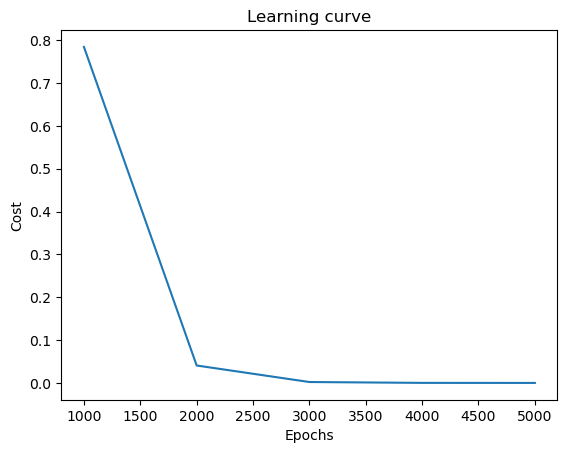

In [14]:
#plotting the learning curve(epochs vs cost)
plt.plot(e_history, cost_history)
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [15]:
#trained model
def trained_model(x):
    global w,b

    """
    returns the best fit lines output
    Args:
        x (scalar): new input
    Returns:
        y (scalar): the predicted output    
    """
    
    y = w*x + b
    return y

In [16]:
y = trained_model(3)
print(f"predicted output: {y}")

predicted output: 699.991080120011
